In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd "/content/drive/MyDrive/Colab_Notebooks"

/content/drive/.shortcut-targets-by-id/1oluhICfAB88fijE63Eml9oYqHw12iAhk/Colab Notebooks


In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1oluhICfAB88fijE63Eml9oYqHw12iAhk/Colab Notebooks'

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from keras.layers import Input, Dense, Reshape, Flatten, Conv2DTranspose, concatenate, Activation, LeakyReLU,BatchNormalization,Conv2D,add
from keras.models import Model
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam,SGD,Adagrad
from keras.models import Model, load_model
from keras.layers import Input,Dropout,add,BatchNormalization
import numpy as np
from tensorflow.keras.initializers import GlorotNormal,HeNormal,RandomNormal
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, UpSampling2D, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal,Orthogonal
from tensorflow.keras.regularizers import l2
from tensorflow_addons.layers import SpectralNormalization,InstanceNormalization
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
tf.keras.backend.clear_session()
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = InteractiveSession(config=ConfigProto(gpu_options=gpu_options))
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/usr/local/lib/python3.9/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
FFHQ_DIR=r'data/image_dump'
FFHQ_read = open(FFHQ_DIR, "rb")
FFHQ_data = pickle.load(FFHQ_read)
np.random.shuffle(FFHQ_data)
# FFHQ_data=FFHQ_data[:1500,:,:,:]
# np.random.shuffle(FFHQ_data)

In [ ]:
FFHQ_data.shape

(1000, 224, 224, 3)

In [ ]:
IMG_SIZE=128
def preprocess_image(image):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image= image.numpy().astype(np.float32)
    return image
new_image = (tf.cast(FFHQ_data, tf.float32) / 127.5)-1
new_image=preprocess_image(new_image)

(1000, 128, 128, 3)


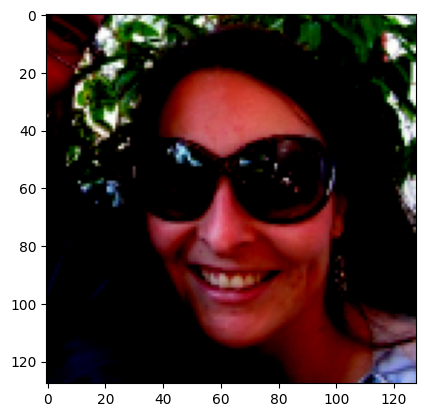

In [ ]:
plt.imshow(new_image[3])
print(new_image.shape)

In [ ]:

# def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
#     gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
#     gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
#     return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


# def get_box(lambda_value):
#     cut_rat = tf.math.sqrt(1.0 - lambda_value)

#     cut_w = IMG_SIZE * cut_rat  # rw
#     cut_w = tf.cast(cut_w, tf.int32)

#     cut_h = IMG_SIZE * cut_rat  # rh
#     cut_h = tf.cast(cut_h, tf.int32)

#     cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
#     cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

#     boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
#     boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
#     bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
#     bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

#     target_h = bby2 - boundaryy1
#     if target_h == 0:
#         target_h += 1

#     target_w = bbx2 - boundaryx1
#     if target_w == 0:
#         target_w += 1

#     return boundaryx1, boundaryy1, target_h, target_w


# def cutmix(train_ds_one, train_ds_two):
#     image1,image2 = train_ds_one, train_ds_two

#     alpha = [0.25]
#     beta = [0.25]

#     # Get a sample from the Beta distribution
#     lambda_value = sample_beta_distribution(1, alpha, beta)

#     # Define Lambda
#     lambda_value = lambda_value[0][0]

#     # Get the bounding box offsets, heights and widths
#     boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

#     # Get a patch from the second image (`image2`)
#     crop2 = tf.image.crop_to_bounding_box(
#         image2, boundaryy1, boundaryx1, target_h, target_w
#     )
#     # Pad the `image2` patch (`crop2`) with the same offset
#     image2 = tf.image.pad_to_bounding_box(
#         crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
#     )
#     # Get a patch from the first image (`image1`)
#     crop1 = tf.image.crop_to_bounding_box(
#         image1, boundaryy1, boundaryx1, target_h, target_w
#     )
#     # Pad the `image1` patch (`crop1`) with the same offset
#     img1 = tf.image.pad_to_bounding_box(
#         crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
#     )

#     # Modify the first image by subtracting the patch from `image1`
#     # (before applying the `image2` patch)
#     image1 = image1 - img1
#     # Add the modified `image1` and `image2`  together to get the CutMix image
#     image = image1 + image2

#     # Adjust Lambda in accordance to the pixel ration
#     lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
#     lambda_value = tf.cast(lambda_value, tf.float32)
#     return image

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 131072)            13238272  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 131072)            0         
                                                                 
 reshape (Reshape)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 64, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 128, 128, 128)    262272    
 ranspose)                                              

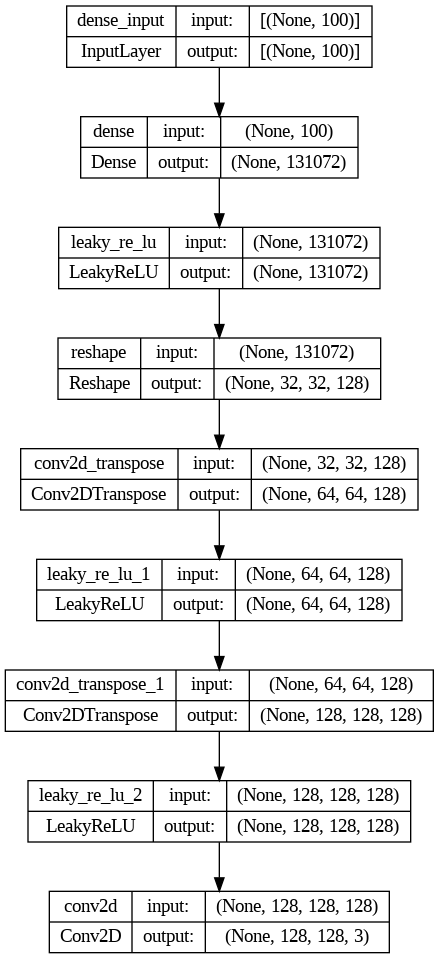

In [ ]:
from tensorflow.python import training
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input,Dropout,add,BatchNormalization
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
def make_generator_model():
    model = Sequential()
 # foundation for 7x7 image
    n_nodes = 128 * 32 * 32
    model.add(Dense(n_nodes, input_dim=(100)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((32, 32, 128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (7,7), activation='tanh', padding='same'))
    return model
 
generator=make_generator_model()
generator.summary()
tf.keras.utils.plot_model(generator,show_shapes=True)

In [ ]:
# class ConditionBatchNormalization(tf.keras.Model):
#   def __init__(self):
#     super(ConditionBatchNormalization, self).__init__()
#     self.decay = 0.5
#     self.epsilon = 1e-04
#     self.test_mean=tf.Variable(initial_value=0, trainable=False, dtype=tf.float32)
#     self.test_var=tf.Variable(initial_value=1, trainable=False, dtype=tf.float32)

#   def build(self, input_shape):
#     self.num_channels=input_shape[0][-1]
#     self.beta_mapping=tf.keras.layers.Dense(self.num_channels)
#     self.gamma_mapping=tf.keras.layers.Dense(self.num_channels)
    
#   def call(self, x, training=None):
#     #Generate beta, gamma
#     x, conditions = x
#     beta = self.beta_mapping(conditions)
#     gamma = self.gamma_mapping(conditions)

#     beta = tf.reshape(beta, shape=[-1, 1, 1, self.num_channels])
#     gamma = tf.reshape(gamma, shape=[-1, 1, 1, self.num_channels])
#     if training:
#         #Calculate mean and varience of X.
#         batch_mean, batch_var = tf.nn.moments(x, [0, 1, 2])
#         #Calculate parameters for test set 
#         self.test_mean = self.test_mean * self.decay + batch_mean * (1 - self.decay)
#         self.test_var = self.test_var * self.decay + batch_var * (1 - self.decay)

#         return tf.nn.batch_normalization(x, batch_mean, batch_var, beta, gamma, self.epsilon)
#     else:
#         return tf.nn.batch_normalization(x, self.test_mean, self.test_var, beta, gamma, self.epsilon)

# class SelfAttention(tf.keras.Model):
#   def __init__(self):
#     super(SelfAttention, self).__init__()

#   def build(self, input_shape):
#     self.num_channels=input_shape[-1]
#     self.hw = input_shape[1]*input_shape[2]
#     self.conv_f=tf.keras.layers.Conv2D(self.num_channels // 4, 1)
#     self.conv_g=tf.keras.layers.Conv2D(self.num_channels // 4, 1)
#     self.conv_h=tf.keras.layers.Conv2D(self.num_channels//2, 1)
#     self.conv_o=tf.keras.layers.Conv2D(self.num_channels, 1)

#   def call(self, x):
#     bs = x.shape[0]
#     f = self.conv_f(x)  # [bs, h, w, c']
#     g = self.conv_g(x)  # [bs, h, w, c']
#     h = self.conv_h(x)  # [bs, h, w, c]

#     f=tf.keras.layers.Reshape([self.hw, f.shape[-1]])(f)
#     g=tf.keras.layers.Reshape([self.hw, g.shape[-1]])(g)
#     h=tf.keras.layers.Reshape([self.hw, h.shape[-1]])(h)
#     # N = h * w
#     s = tf.matmul(g, f, transpose_b=True)  # # [bs, N, N]
#     beta = tf.nn.softmax(s)  # attention map

#     o = tf.matmul(beta, h)  # [bs, N, C]
#     o = tf.keras.layers.Reshape([x.shape[1], x.shape[2], self.num_channels//2])(o)
#     o = self.conv_o(o)
#       # [bs, h, w, C]
#     return x + o

In [ ]:
latent_dim=100
num_img=10
random_latent_vectors = tf.random.normal(shape=(100, latent_dim))
img=generator.predict(random_latent_vectors,batch_size=10,steps=1)
# img=tf.keras.backend.eval(img)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 11s 11s/step


(10, 128, 128, 3)


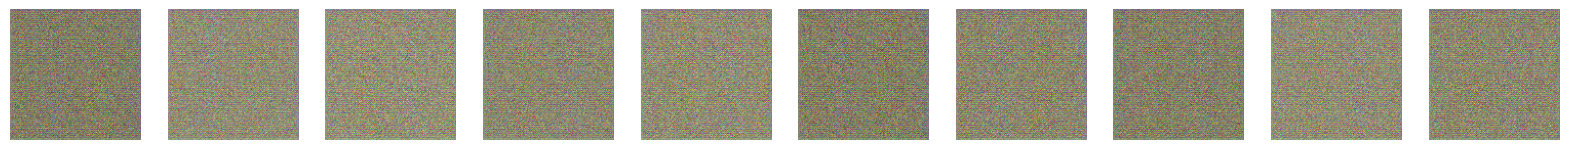

In [ ]:
# img=tf.keras.backend.eval(img)

print(img.shape)
# img = img.eval(session=tf.compat.v1.Session())
fig=plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,10,i + 1)
    image1 = tf.keras.preprocessing.image.array_to_img(np.array(img[i]))
    plt.imshow(image1)
    plt.axis('off')
plt.show()
# print(discriminator({'image':img}).numpy())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 dropout (Dropout)           (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)      

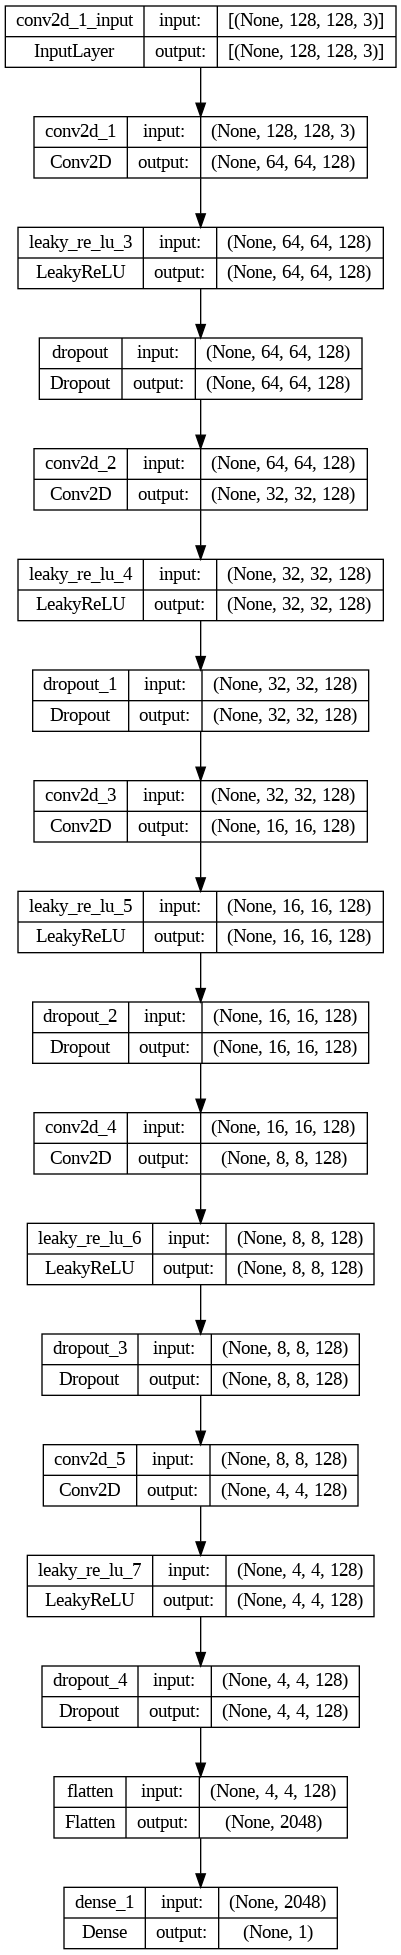

In [ ]:
def resnet_block(input,filter_size):
  conv=Conv2D(filter_size,(3,3),kernel_initializer=HeNormal(),padding='same')(input)
  conv=BatchNormalization()(conv)
  # conv=LeakyReLU()(conv)
  # conv=InstanceNormalization()(conv)
  conv=Dropout(0.4)(conv)
  conv=Conv2D(filter_size,(3,3),kernel_initializer=HeNormal(),padding='same')(conv)
  conv=BatchNormalization()(conv)
  # conv=LeakyReLU()(conv)
  # conv=InstanceNormalization()(conv)
  conv=Dropout(0.4)(conv)
  conv=add([input,conv])
  return conv
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                              kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

def make_discriminator():
  model = Sequential()
  model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same', input_shape=(128,128,3)))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  # opt = Adam(lr=0.0002, beta_1=0.5)
  # model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

discriminator=make_discriminator()
discriminator.summary()
tf.keras.utils.plot_model(discriminator,show_shapes=True)


In [ ]:
ypred_bottleneck=discriminator.predict(img)

1/1 [==============================] - 0s 267ms/step


In [ ]:
ypred_bottleneck

array([[0.5000014 ],
       [0.50003797],
       [0.5000034 ],
       [0.50003326],
       [0.5000139 ],
       [0.49997997],
       [0.5000316 ],
       [0.5000326 ],
       [0.5000177 ],
       [0.49997246]], dtype=float32)

In [ ]:
from keras.losses import BinaryCrossentropy
generator_optimizer = tf.keras.optimizers.Adam(0.00005)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
# encoder_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
# decoder_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)

generator_loss=BinaryCrossentropy(from_logits=True)
discriminator_loss=BinaryCrossentropy(from_logits=True)
# encoder_loss=BinaryCrossentropy(from_logits=True)
# decoder_loss=BinaryCrossentropy(from_logits=True)

# def hinge_loss(y_true, y_pred):
#     return tf.reduce_mean(tf.maximum(1.0 - y_true * y_pred, 0.0))

# def discriminator_loss(y_true, y_pred):
#     real_loss = hinge_loss(y_true, y_pred)
#     fake_loss = hinge_loss(-y_true, -y_pred)
#     return real_loss + fake_loss

# def generator_loss(_, y_pred):
#     return -tf.reduce_mean(y_pred)

# def discriminator_loss()
#         logits_real: tf.Tensor,
#         logits_fake: tf.Tensor,
#     ) -> tf.Tensor:
#         """
#         Computes the "hinge" discriminator loss given two
#         discriminator outputs, `logits_real` and `logits_fake`.
#         Cf. Miyato, https://arxiv.org/pdf/1802.05957.pdf,
#         equation 16.
#         """
#         L_D = tf.reduce_sum(tf.nn.relu(1.0 - logits_real)) \
#             + tf.reduce_sum(tf.nn.relu(1.0 + logits_fake))
#         return L_D * (1.0 / BATCH_SIZE)

# def generator_loss(
#     logits_fake: tf.Tensor,
# ) -> tf.Tensor:
#     """
#     Computes the "hinge" generator loss given one
#     discriminator output, `logits_fake`.
#     Cf. Miyato, https://arxiv.org/pdf/1802.05957.pdf,
#     equation 17.
#     """
#     L_G = -tf.reduce_sum(logits_fake)
#     return L_G * (1.0 / BATCH_SIZE)



In [ ]:
# from matplotlib.lines import Real

# def preprocess_image1(image):
#     return image


# def augumentation(real,fake):

#   train_ds_one = (
#       tf.data.Dataset.from_tensor_slices(real)
#       .shuffle(1024)
#       .map(preprocess_image1, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#   )
#   train_ds_two = (
#       tf.data.Dataset.from_tensor_slices(fake)
#       .shuffle(1024)
#       .map(preprocess_image1, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#   )

#   train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))
#   train_ds_cmu = (
#     train_ds.shuffle(1024)
#     .map(cutmix, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#     .batch(BATCH_SIZE)
#     .prefetch(tf.data.experimental.AUTOTUNE)
#   )
#   return train_ds_cmu

In [ ]:
class GAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,generator_optimizer,discriminator_optimizer,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.generator_optimizer=generator_optimizer
    self.discriminator_optimizer=discriminator_optimizer
    # self.encoder_optimizer=encoder_optimizer
    # self.decoder_optimizer=decoder_optimizer
    pass
  def train_step(self,images):
    # real_images=images
    noise=tf.random.normal((BATCH_SIZE,100))

    with tf.GradientTape() as g_tape,tf.GradientTape() as d_tape:
      generated_image=self.generator(noise,training=True)
      
      # train_ds_cmu=augumentation(images,generated_image)
      # tf.config.run_functions_eagerly(True)
      # augumented_images = train_ds_cmu.as_numpy_iterator()
      # augumented_images = np.concatenate([batch for batch in augumented_images], axis=0)

      # ypred_real_encoder,ypred_real_decoder=self.discriminator(images,training=True)
      # ypred_real_decoder=self.decoder(images,training=True)

      # ypred_fake_encoder,ypred_fake_decoder=self.discriminator(generated_image,training=True)
      # ypred_fake_decoder=self.decoder(generated_image,training=True)


      # ypred_gen_encoder,ypred_gen_decoder=self.discriminator(generated_image,training=False)
      # ypred_gen_decoder=self.decoder(generated_image,training=False)

      ypred_real_decoder=self.discriminator(images,training=True)
      ypred_fake_decoder=self.discriminator(generated_image,training=True)
      ypred_gen_decoder=self.discriminator(generated_image,training=False)


      # real_loss=discriminator_loss(tf.ones_like(ypred_real_encoder),ypred_real_encoder)+discriminator_loss(tf.ones_like(ypred_real_decoder),ypred_real_decoder)
      # fake_loss=discriminator_loss(tf.zeros_like(ypred_fake_encoder),ypred_fake_encoder)+discriminator_loss(tf.zeros_like(ypred_fake_decoder),ypred_fake_decoder)
      
      real_loss=discriminator_loss(tf.ones_like(ypred_real_decoder),ypred_real_decoder)
      fake_loss=discriminator_loss(tf.zeros_like(ypred_fake_decoder),ypred_fake_decoder)
      total_d_loss=real_loss+fake_loss

      # total_g_loss=generator_loss(tf.ones_like(ypred_gen_encoder),ypred_gen_encoder)+generator_loss(tf.ones_like(ypred_gen_decoder),ypred_gen_decoder)
      total_g_loss=generator_loss(tf.ones_like(ypred_gen_decoder),ypred_gen_decoder)



    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)

    self.generator_optimizer.apply_gradients(zip(ggrad,self.generator.trainable_variables))
    self.discriminator_optimizer.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))




    return {"d_loss:":total_d_loss,"g_loss:":total_g_loss}




In [ ]:
GAN_model=GAN(generator,discriminator)
GAN_model.compile(generator_optimizer,discriminator_optimizer)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image
# reduce_lr_disc = ReduceLROnPlateau(monitor='d_loss:', factor=0.1, patience=3, min_lr=0.01)
# reduce_lr_gen = ReduceLROnPlateau(monitor='g_loss:', factor=0.1, patience=3, min_lr=0.01)
class ModelMonitor(Callback):
    def __init__(self, num_img=1, latent_dim=(100)):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        # random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim))
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        # d_image=self.model.discriminator(generated_images)
#         disc_images=self.model.discriminator(generated_images)
        generated_images *= 255
#         disc_images*=255
        generated_images.numpy()
#         disc_images.numpy()

        for i in range(self.num_img):
            gen_img = array_to_img(generated_images[i])
#             disc_img = array_to_img(disc_images[i])
            gen_img.save(os.path.join('images2', f'generated_img_{epoch}_{i}.png'))
#             new_image1 = Image.new('RGB',(2*128, 128), (250,250,250))
#             new_image1.paste(gen_img,(0,0))
#             new_image1.paste(disc_img,(128,0))
#             new_image1.save(os.path.join('images2', f'generated_img_{epoch}_{i}.png'))
          # self.model.save_pretrained('images2')
            self.model.generator.save('generator_model2.h5')
            self.model.discriminator.save('discriminator_model2.h5')

            
            
        def on_train_end(self, logs=None):
          self.model.save_pretrained('images2')
          self.generator.save('generator_model3.h5')
          self.discriminator.save('discriminator_model3.h5')
        

In [ ]:
epochs=500
BATCH_SIZE=64
# Model_=GAN_model.fit(new_image,epochs=epochs,batch_size=BATCH_SIZE,callbacks=[ModelMonitor(),reduce_lr_disc,reduce_lr_gen])
Model_=GAN_model.fit(new_image,epochs=epochs,batch_size=BATCH_SIZE,callbacks=[ModelMonitor()])

Epoch 1/500


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - ETA: 0s - d_loss:: 0.7963 - g_loss:: 0.7341

16/16 [==============================] - 30s 1s/step - d_loss:: 0.7817 - g_loss:: 0.7419
Epoch 2/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1271 - g_loss:: 6.9231

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.1196 - g_loss:: 7.5972
Epoch 3/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0054 - g_loss:: 22.1964

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.0051 - g_loss:: 21.9674
Epoch 4/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0111 - g_loss:: 13.0961    

16/16 [==============================] - 15s 962ms/step - d_loss:: 0.0206 - g_loss:: 12.6266
Epoch 5/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0335 - g_loss:: 10.4515

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.0315 - g_loss:: 10.9041
Epoch 6/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0023 - g_loss:: 31.8355

16/16 [==============================] - 16s 998ms/step - d_loss:: 0.0022 - g_loss:: 33.7390
Epoch 7/500
16/16 [==============================] - ETA: 0s - d_loss:: 4.4559e-13 - g_loss:: 95.2762

16/16 [==============================] - 14s 903ms/step - d_loss:: 4.1938e-13 - g_loss:: 94.2717
Epoch 8/500
16/16 [==============================] - ETA: 0s - d_loss:: 4.6434 - g_loss:: 60.1777

16/16 [==============================] - 15s 936ms/step - d_loss:: 4.3702 - g_loss:: 59.3073
Epoch 9/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0863 - g_loss:: 10.7962

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.0838 - g_loss:: 10.3680
Epoch 10/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0286 - g_loss:: 4.0204

16/16 [==============================] - 15s 950ms/step - d_loss:: 0.0279 - g_loss:: 4.0500
Epoch 11/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0168 - g_loss:: 4.3871

16/16 [==============================] - 15s 975ms/step - d_loss:: 0.0170 - g_loss:: 4.3706
Epoch 12/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1262 - g_loss:: 3.6915

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.1220 - g_loss:: 3.7655
Epoch 13/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3421 - g_loss:: 8.2196

16/16 [==============================] - 15s 973ms/step - d_loss:: 0.3276 - g_loss:: 8.3741
Epoch 14/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0660 - g_loss:: 9.2711

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0631 - g_loss:: 9.5292
Epoch 15/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.6815 - g_loss:: 11.8258

16/16 [==============================] - 15s 942ms/step - d_loss:: 1.8593 - g_loss:: 11.5414
Epoch 16/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.3041 - g_loss:: 1.6665

16/16 [==============================] - 15s 938ms/step - d_loss:: 1.2523 - g_loss:: 1.6470
Epoch 17/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2907 - g_loss:: 1.8029

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.2844 - g_loss:: 1.8125
Epoch 18/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1329 - g_loss:: 2.3361

16/16 [==============================] - 15s 945ms/step - d_loss:: 0.1299 - g_loss:: 2.3588
Epoch 19/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1205 - g_loss:: 3.3077

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.1152 - g_loss:: 3.3504
Epoch 20/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0720 - g_loss:: 4.4548

16/16 [==============================] - 15s 927ms/step - d_loss:: 0.0689 - g_loss:: 4.4814
Epoch 21/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0372 - g_loss:: 5.3595

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0359 - g_loss:: 5.4084
Epoch 22/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0129 - g_loss:: 7.9271

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0122 - g_loss:: 8.0190
Epoch 23/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.0717e-04 - g_loss:: 10.2376

16/16 [==============================] - 15s 971ms/step - d_loss:: 1.0489e-04 - g_loss:: 10.2558
Epoch 24/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0024 - g_loss:: 10.7406

16/16 [==============================] - 15s 933ms/step - d_loss:: 0.0023 - g_loss:: 10.7752
Epoch 25/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0120 - g_loss:: 12.2959

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.0114 - g_loss:: 12.3531
Epoch 26/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0016 - g_loss:: 14.3707

16/16 [==============================] - 16s 980ms/step - d_loss:: 0.0020 - g_loss:: 14.3872
Epoch 27/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0642 - g_loss:: 15.8276

16/16 [==============================] - 15s 958ms/step - d_loss:: 0.0604 - g_loss:: 15.7797
Epoch 28/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0014 - g_loss:: 13.1731

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0013 - g_loss:: 13.0966
Epoch 29/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0181 - g_loss:: 11.9325

16/16 [==============================] - 15s 967ms/step - d_loss:: 0.0170 - g_loss:: 12.0191
Epoch 30/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0420 - g_loss:: 12.6383

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.0451 - g_loss:: 12.6893
Epoch 31/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0472 - g_loss:: 14.2961

16/16 [==============================] - 15s 974ms/step - d_loss:: 0.0444 - g_loss:: 14.3691
Epoch 32/500
16/16 [==============================] - ETA: 0s - d_loss:: 8.5418e-05 - g_loss:: 15.3456

16/16 [==============================] - 15s 944ms/step - d_loss:: 8.1154e-05 - g_loss:: 15.3345
Epoch 33/500
16/16 [==============================] - ETA: 0s - d_loss:: 4.4300e-06 - g_loss:: 14.9455

16/16 [==============================] - 15s 955ms/step - d_loss:: 4.4351e-06 - g_loss:: 14.9313
Epoch 34/500
16/16 [==============================] - ETA: 0s - d_loss:: 5.9205e-04 - g_loss:: 14.6681

16/16 [==============================] - 15s 955ms/step - d_loss:: 5.5752e-04 - g_loss:: 14.6713
Epoch 35/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0022 - g_loss:: 14.6424

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0021 - g_loss:: 14.6734
Epoch 36/500
16/16 [==============================] - ETA: 0s - d_loss:: 7.2457e-04 - g_loss:: 15.5919

16/16 [==============================] - 15s 954ms/step - d_loss:: 6.8489e-04 - g_loss:: 15.5956
Epoch 37/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0086 - g_loss:: 15.1605

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.0081 - g_loss:: 15.1983
Epoch 38/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0020 - g_loss:: 15.5049

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.0020 - g_loss:: 15.4987
Epoch 39/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0095 - g_loss:: 15.8961

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0089 - g_loss:: 15.8785
Epoch 40/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0017 - g_loss:: 15.9738

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0016 - g_loss:: 15.9912
Epoch 41/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0159 - g_loss:: 16.0990

16/16 [==============================] - 15s 941ms/step - d_loss:: 0.0154 - g_loss:: 16.1737
Epoch 42/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1108 - g_loss:: 15.1894

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1043 - g_loss:: 15.1479
Epoch 43/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0299 - g_loss:: 13.7901

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.0375 - g_loss:: 13.7232
Epoch 44/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0133 - g_loss:: 12.1749

16/16 [==============================] - 16s 979ms/step - d_loss:: 0.0130 - g_loss:: 12.1028
Epoch 45/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0156 - g_loss:: 10.1130

16/16 [==============================] - 15s 973ms/step - d_loss:: 0.0263 - g_loss:: 9.9808
Epoch 46/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2224 - g_loss:: 8.9193

16/16 [==============================] - 15s 966ms/step - d_loss:: 0.2312 - g_loss:: 9.0199
Epoch 47/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5380 - g_loss:: 14.7321

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.5200 - g_loss:: 15.1694
Epoch 48/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3433 - g_loss:: 15.3449

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.3526 - g_loss:: 15.2221
Epoch 49/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2308 - g_loss:: 17.2396

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2308 - g_loss:: 17.4957
Epoch 50/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.4466 - g_loss:: 15.5563

16/16 [==============================] - 16s 1s/step - d_loss:: 1.4013 - g_loss:: 14.9421
Epoch 51/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.6835 - g_loss:: 3.7896

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.6645 - g_loss:: 3.7342
Epoch 52/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1725 - g_loss:: 4.6709

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1673 - g_loss:: 4.6818
Epoch 53/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0713 - g_loss:: 5.1102

16/16 [==============================] - 15s 970ms/step - d_loss:: 0.0699 - g_loss:: 5.1049
Epoch 54/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0549 - g_loss:: 5.5693

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0565 - g_loss:: 5.6142
Epoch 55/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0749 - g_loss:: 5.1496

16/16 [==============================] - 16s 998ms/step - d_loss:: 0.0747 - g_loss:: 5.1397
Epoch 56/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1129 - g_loss:: 4.6991

16/16 [==============================] - 15s 969ms/step - d_loss:: 0.1224 - g_loss:: 4.7241
Epoch 57/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1400 - g_loss:: 5.0710

16/16 [==============================] - 15s 970ms/step - d_loss:: 0.1387 - g_loss:: 5.0424
Epoch 58/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1099 - g_loss:: 5.7857

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.1074 - g_loss:: 5.8348
Epoch 59/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1924 - g_loss:: 8.3139

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.1885 - g_loss:: 8.2535
Epoch 60/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2594 - g_loss:: 14.0897

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.2532 - g_loss:: 14.2421
Epoch 61/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3741 - g_loss:: 14.4268

16/16 [==============================] - 16s 1s/step - d_loss:: 0.3721 - g_loss:: 14.3956
Epoch 62/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5979 - g_loss:: 7.7171

16/16 [==============================] - 15s 932ms/step - d_loss:: 0.5884 - g_loss:: 7.5895
Epoch 63/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3250 - g_loss:: 5.2845

16/16 [==============================] - 15s 941ms/step - d_loss:: 0.3269 - g_loss:: 5.2959
Epoch 64/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4652 - g_loss:: 5.5770

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.4717 - g_loss:: 5.5798
Epoch 65/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.8125 - g_loss:: 4.9280

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.7894 - g_loss:: 4.9291
Epoch 66/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2317 - g_loss:: 4.1340

16/16 [==============================] - 15s 970ms/step - d_loss:: 0.2243 - g_loss:: 4.1284
Epoch 67/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0777 - g_loss:: 4.6395

16/16 [==============================] - 15s 964ms/step - d_loss:: 0.0754 - g_loss:: 4.6581
Epoch 68/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0629 - g_loss:: 4.9983

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0659 - g_loss:: 5.0005
Epoch 69/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1388 - g_loss:: 4.7872

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1450 - g_loss:: 4.7357
Epoch 70/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2879 - g_loss:: 4.6491

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.3108 - g_loss:: 4.6723
Epoch 71/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4524 - g_loss:: 4.0445

16/16 [==============================] - 15s 976ms/step - d_loss:: 0.4382 - g_loss:: 4.0504
Epoch 72/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3497 - g_loss:: 4.4285

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.3370 - g_loss:: 4.4311
Epoch 73/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3965 - g_loss:: 4.5848

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.4195 - g_loss:: 4.5949
Epoch 74/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.7473 - g_loss:: 2.9643

16/16 [==============================] - 16s 1s/step - d_loss:: 0.7240 - g_loss:: 2.9172
Epoch 75/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2638 - g_loss:: 2.6827

16/16 [==============================] - 15s 940ms/step - d_loss:: 0.2557 - g_loss:: 2.6999
Epoch 76/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0838 - g_loss:: 3.5944

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.0822 - g_loss:: 3.6117
Epoch 77/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1114 - g_loss:: 4.8323

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.1061 - g_loss:: 4.9007
Epoch 78/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0597 - g_loss:: 5.8889

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.0586 - g_loss:: 5.8715
Epoch 79/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0806 - g_loss:: 6.1032

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.0795 - g_loss:: 6.0874
Epoch 80/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0837 - g_loss:: 7.0147

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.0852 - g_loss:: 7.0465
Epoch 81/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0616 - g_loss:: 8.8023

16/16 [==============================] - 15s 939ms/step - d_loss:: 0.0697 - g_loss:: 8.7693
Epoch 82/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1379 - g_loss:: 8.0980

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1358 - g_loss:: 8.0544
Epoch 83/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4327 - g_loss:: 6.8631

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.4390 - g_loss:: 6.8757
Epoch 84/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4762 - g_loss:: 5.9440

16/16 [==============================] - 16s 979ms/step - d_loss:: 0.4764 - g_loss:: 5.8735
Epoch 85/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2933 - g_loss:: 4.0311

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.2912 - g_loss:: 4.0241
Epoch 86/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1729 - g_loss:: 4.3969

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.1654 - g_loss:: 4.4290
Epoch 87/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1530 - g_loss:: 4.6884

16/16 [==============================] - 15s 939ms/step - d_loss:: 0.1563 - g_loss:: 4.6961
Epoch 88/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1686 - g_loss:: 4.6297

16/16 [==============================] - 15s 942ms/step - d_loss:: 0.1700 - g_loss:: 4.5885
Epoch 89/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2483 - g_loss:: 4.4538

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2469 - g_loss:: 4.4254
Epoch 90/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3334 - g_loss:: 3.6792

16/16 [==============================] - 16s 1s/step - d_loss:: 0.3276 - g_loss:: 3.6506
Epoch 91/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2579 - g_loss:: 3.8034

16/16 [==============================] - 15s 939ms/step - d_loss:: 0.2560 - g_loss:: 3.8229
Epoch 92/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2343 - g_loss:: 4.3860

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.2316 - g_loss:: 4.4152
Epoch 93/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1066 - g_loss:: 5.2386

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.1034 - g_loss:: 5.2594
Epoch 94/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1205 - g_loss:: 5.5676

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.1222 - g_loss:: 5.5278
Epoch 95/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2997 - g_loss:: 5.4043

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.2964 - g_loss:: 5.4195
Epoch 96/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1879 - g_loss:: 5.5824

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2089 - g_loss:: 5.6545
Epoch 97/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2666 - g_loss:: 5.3063

16/16 [==============================] - 15s 950ms/step - d_loss:: 0.2572 - g_loss:: 5.2996
Epoch 98/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1079 - g_loss:: 5.4999

16/16 [==============================] - 15s 942ms/step - d_loss:: 0.1037 - g_loss:: 5.4984
Epoch 99/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1262 - g_loss:: 4.7335

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.1294 - g_loss:: 4.6708
Epoch 100/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1761 - g_loss:: 4.6685

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.1734 - g_loss:: 4.7351
Epoch 101/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1127 - g_loss:: 5.5439

16/16 [==============================] - 15s 944ms/step - d_loss:: 0.1187 - g_loss:: 5.5890
Epoch 102/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2431 - g_loss:: 4.7434

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.2429 - g_loss:: 4.6758
Epoch 103/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1613 - g_loss:: 5.4936

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.1530 - g_loss:: 5.5097
Epoch 104/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2473 - g_loss:: 4.5270

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2663 - g_loss:: 4.4632
Epoch 105/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2268 - g_loss:: 4.8083

16/16 [==============================] - 15s 935ms/step - d_loss:: 0.2195 - g_loss:: 4.9192
Epoch 106/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0601 - g_loss:: 6.1406

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0583 - g_loss:: 6.1168
Epoch 107/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0714 - g_loss:: 5.7333

16/16 [==============================] - 15s 927ms/step - d_loss:: 0.0753 - g_loss:: 5.7264
Epoch 108/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1576 - g_loss:: 5.3957

16/16 [==============================] - 15s 938ms/step - d_loss:: 0.1570 - g_loss:: 5.4262
Epoch 109/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0819 - g_loss:: 6.3490

16/16 [==============================] - 15s 943ms/step - d_loss:: 0.0880 - g_loss:: 6.3379
Epoch 110/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4761 - g_loss:: 6.8789

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.4819 - g_loss:: 6.8713
Epoch 111/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5094 - g_loss:: 4.5582

16/16 [==============================] - 15s 927ms/step - d_loss:: 0.4936 - g_loss:: 4.5914
Epoch 112/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1640 - g_loss:: 5.0288

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1622 - g_loss:: 5.0408
Epoch 113/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1911 - g_loss:: 4.4394

16/16 [==============================] - 16s 997ms/step - d_loss:: 0.1946 - g_loss:: 4.3820
Epoch 114/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4181 - g_loss:: 4.5310

16/16 [==============================] - 15s 950ms/step - d_loss:: 0.4037 - g_loss:: 4.5517
Epoch 115/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1607 - g_loss:: 4.8823

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.1566 - g_loss:: 4.8948
Epoch 116/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0332 - g_loss:: 5.8017

16/16 [==============================] - 15s 976ms/step - d_loss:: 0.0336 - g_loss:: 5.8270
Epoch 117/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0798 - g_loss:: 6.1365

16/16 [==============================] - 15s 946ms/step - d_loss:: 0.0763 - g_loss:: 6.1325
Epoch 118/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1951 - g_loss:: 5.4245

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.1918 - g_loss:: 5.3473
Epoch 119/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1716 - g_loss:: 5.6078

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.1667 - g_loss:: 5.5702
Epoch 120/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1044 - g_loss:: 5.9708

16/16 [==============================] - 15s 973ms/step - d_loss:: 0.1146 - g_loss:: 5.9419
Epoch 121/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.7211 - g_loss:: 5.9926

16/16 [==============================] - 15s 940ms/step - d_loss:: 0.7389 - g_loss:: 5.9376
Epoch 122/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5322 - g_loss:: 3.9215

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.5168 - g_loss:: 3.9474
Epoch 123/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2989 - g_loss:: 3.5967

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.3067 - g_loss:: 3.6112
Epoch 124/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4638 - g_loss:: 3.2896

16/16 [==============================] - 15s 966ms/step - d_loss:: 0.4657 - g_loss:: 3.2871
Epoch 125/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3835 - g_loss:: 3.4562

16/16 [==============================] - 15s 975ms/step - d_loss:: 0.3795 - g_loss:: 3.4415
Epoch 126/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2260 - g_loss:: 3.9804

16/16 [==============================] - 16s 980ms/step - d_loss:: 0.2247 - g_loss:: 4.0036
Epoch 127/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2023 - g_loss:: 4.1324

16/16 [==============================] - 15s 967ms/step - d_loss:: 0.2048 - g_loss:: 4.1368
Epoch 128/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2321 - g_loss:: 3.9734

16/16 [==============================] - 15s 975ms/step - d_loss:: 0.2306 - g_loss:: 3.9727
Epoch 129/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2136 - g_loss:: 4.6280

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.2117 - g_loss:: 4.6645
Epoch 130/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2562 - g_loss:: 5.0636

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.2653 - g_loss:: 4.9747
Epoch 131/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2801 - g_loss:: 4.4001

16/16 [==============================] - 15s 977ms/step - d_loss:: 0.2770 - g_loss:: 4.3891
Epoch 132/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2679 - g_loss:: 4.7999

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.2597 - g_loss:: 4.7922
Epoch 133/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2959 - g_loss:: 4.9172

16/16 [==============================] - 15s 958ms/step - d_loss:: 0.2926 - g_loss:: 4.9561
Epoch 134/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5066 - g_loss:: 4.1629

16/16 [==============================] - 16s 1s/step - d_loss:: 0.5138 - g_loss:: 4.1818
Epoch 135/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2649 - g_loss:: 5.0916

16/16 [==============================] - 15s 976ms/step - d_loss:: 0.2663 - g_loss:: 5.1451
Epoch 136/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.7345 - g_loss:: 5.6732

16/16 [==============================] - 15s 945ms/step - d_loss:: 0.7622 - g_loss:: 5.5609
Epoch 137/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5007 - g_loss:: 2.7935

16/16 [==============================] - 15s 937ms/step - d_loss:: 0.4855 - g_loss:: 2.7664
Epoch 138/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2553 - g_loss:: 3.1245

16/16 [==============================] - 15s 942ms/step - d_loss:: 0.2589 - g_loss:: 3.1011
Epoch 139/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2864 - g_loss:: 3.4340

16/16 [==============================] - 15s 970ms/step - d_loss:: 0.2881 - g_loss:: 3.4503
Epoch 140/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4254 - g_loss:: 3.2085

16/16 [==============================] - 15s 946ms/step - d_loss:: 0.4227 - g_loss:: 3.2297
Epoch 141/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3728 - g_loss:: 3.3593

16/16 [==============================] - 15s 964ms/step - d_loss:: 0.3662 - g_loss:: 3.3883
Epoch 142/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3788 - g_loss:: 3.2297

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.3691 - g_loss:: 3.2361
Epoch 143/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3925 - g_loss:: 3.0628

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.3931 - g_loss:: 3.0623
Epoch 144/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3063 - g_loss:: 3.2721

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.3035 - g_loss:: 3.2789
Epoch 145/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2407 - g_loss:: 3.3179

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.2401 - g_loss:: 3.3442
Epoch 146/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2469 - g_loss:: 3.7091

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.2462 - g_loss:: 3.6533
Epoch 147/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3035 - g_loss:: 3.5500

16/16 [==============================] - 15s 950ms/step - d_loss:: 0.3051 - g_loss:: 3.5731
Epoch 148/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2559 - g_loss:: 4.1176

16/16 [==============================] - 15s 958ms/step - d_loss:: 0.2679 - g_loss:: 4.1572
Epoch 149/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2325 - g_loss:: 4.2001

16/16 [==============================] - 17s 1s/step - d_loss:: 0.2278 - g_loss:: 4.2105
Epoch 150/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3407 - g_loss:: 4.0109

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.3383 - g_loss:: 3.9814
Epoch 151/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1602 - g_loss:: 4.6528

16/16 [==============================] - 15s 968ms/step - d_loss:: 0.1598 - g_loss:: 4.6487
Epoch 152/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2233 - g_loss:: 4.8892

16/16 [==============================] - 15s 964ms/step - d_loss:: 0.2337 - g_loss:: 4.8435
Epoch 153/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4350 - g_loss:: 4.0484

16/16 [==============================] - 17s 1s/step - d_loss:: 0.4173 - g_loss:: 4.0972
Epoch 154/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4001 - g_loss:: 4.2650

16/16 [==============================] - 17s 1s/step - d_loss:: 0.4228 - g_loss:: 4.2825
Epoch 155/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4132 - g_loss:: 4.6075

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.4134 - g_loss:: 4.5642
Epoch 156/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3580 - g_loss:: 3.9570

16/16 [==============================] - 15s 937ms/step - d_loss:: 0.3564 - g_loss:: 3.9356
Epoch 157/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3668 - g_loss:: 3.3823

16/16 [==============================] - 15s 942ms/step - d_loss:: 0.3751 - g_loss:: 3.3743
Epoch 158/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5230 - g_loss:: 3.1286

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.5225 - g_loss:: 3.1273
Epoch 159/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4189 - g_loss:: 3.2755

16/16 [==============================] - 15s 940ms/step - d_loss:: 0.4110 - g_loss:: 3.2764
Epoch 160/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2983 - g_loss:: 3.3817

16/16 [==============================] - 16s 980ms/step - d_loss:: 0.2930 - g_loss:: 3.3749
Epoch 161/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3995 - g_loss:: 3.2474

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.4037 - g_loss:: 3.2301
Epoch 162/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4817 - g_loss:: 3.2124

16/16 [==============================] - 15s 968ms/step - d_loss:: 0.4739 - g_loss:: 3.2299
Epoch 163/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2718 - g_loss:: 4.2657

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2679 - g_loss:: 4.2520
Epoch 164/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2956 - g_loss:: 4.4417

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2915 - g_loss:: 4.3902
Epoch 165/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3640 - g_loss:: 3.8950

16/16 [==============================] - 16s 981ms/step - d_loss:: 0.3640 - g_loss:: 3.8601
Epoch 166/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3604 - g_loss:: 3.3804

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.3624 - g_loss:: 3.3418
Epoch 167/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3626 - g_loss:: 3.5001

16/16 [==============================] - 15s 971ms/step - d_loss:: 0.3606 - g_loss:: 3.5346
Epoch 168/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2781 - g_loss:: 3.7508

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.2829 - g_loss:: 3.7502
Epoch 169/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2843 - g_loss:: 3.3639

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2865 - g_loss:: 3.3494
Epoch 170/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3069 - g_loss:: 3.6733

16/16 [==============================] - 15s 934ms/step - d_loss:: 0.3170 - g_loss:: 3.6351
Epoch 171/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4274 - g_loss:: 3.3647

16/16 [==============================] - 15s 973ms/step - d_loss:: 0.4191 - g_loss:: 3.4085
Epoch 172/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2883 - g_loss:: 4.2025

16/16 [==============================] - 15s 979ms/step - d_loss:: 0.2882 - g_loss:: 4.2201
Epoch 173/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2665 - g_loss:: 4.6485

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.2603 - g_loss:: 4.6530
Epoch 174/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5602 - g_loss:: 5.0500

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.7855 - g_loss:: 5.3269
Epoch 175/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.1675 - g_loss:: 3.0895

16/16 [==============================] - 15s 941ms/step - d_loss:: 1.1477 - g_loss:: 3.0672
Epoch 176/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4072 - g_loss:: 2.9425

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.4005 - g_loss:: 2.9450
Epoch 177/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3460 - g_loss:: 3.4953

16/16 [==============================] - 16s 1s/step - d_loss:: 0.3448 - g_loss:: 3.4816
Epoch 178/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4209 - g_loss:: 3.2568

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.4295 - g_loss:: 3.2446
Epoch 179/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4148 - g_loss:: 3.6566

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.4138 - g_loss:: 3.6445
Epoch 180/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3374 - g_loss:: 3.8247

16/16 [==============================] - 15s 943ms/step - d_loss:: 0.3392 - g_loss:: 3.7912
Epoch 181/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2243 - g_loss:: 4.2974

16/16 [==============================] - 15s 951ms/step - d_loss:: 0.2232 - g_loss:: 4.3289
Epoch 182/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2215 - g_loss:: 4.5810

16/16 [==============================] - 15s 944ms/step - d_loss:: 0.2232 - g_loss:: 4.5572
Epoch 183/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4387 - g_loss:: 4.0290

16/16 [==============================] - 15s 941ms/step - d_loss:: 0.4454 - g_loss:: 3.9678
Epoch 184/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3813 - g_loss:: 4.5908

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.3707 - g_loss:: 4.6179
Epoch 185/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2073 - g_loss:: 6.1883

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2234 - g_loss:: 6.2073
Epoch 186/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5657 - g_loss:: 4.6942

16/16 [==============================] - 15s 950ms/step - d_loss:: 0.5697 - g_loss:: 4.6163
Epoch 187/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2131 - g_loss:: 4.7239

16/16 [==============================] - 16s 981ms/step - d_loss:: 0.2100 - g_loss:: 4.6827
Epoch 188/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1863 - g_loss:: 4.8969

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.1933 - g_loss:: 4.8636
Epoch 189/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3357 - g_loss:: 3.8438

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.3311 - g_loss:: 3.8645
Epoch 190/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.6221 - g_loss:: 3.2144

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.6479 - g_loss:: 3.2356
Epoch 191/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4553 - g_loss:: 3.1273

16/16 [==============================] - 15s 933ms/step - d_loss:: 0.4527 - g_loss:: 3.1300
Epoch 192/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4283 - g_loss:: 3.5941

16/16 [==============================] - 15s 945ms/step - d_loss:: 0.4402 - g_loss:: 3.5710
Epoch 193/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3242 - g_loss:: 4.3474

16/16 [==============================] - 15s 939ms/step - d_loss:: 0.3155 - g_loss:: 4.3588
Epoch 194/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1878 - g_loss:: 6.1100

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.1850 - g_loss:: 6.1581
Epoch 195/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1202 - g_loss:: 6.4576

16/16 [==============================] - 15s 940ms/step - d_loss:: 0.1156 - g_loss:: 6.4801
Epoch 196/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1501 - g_loss:: 7.1770

16/16 [==============================] - 15s 962ms/step - d_loss:: 0.1601 - g_loss:: 7.2164
Epoch 197/500
16/16 [==============================] - ETA: 0s - d_loss:: 1.8684 - g_loss:: 5.0597

16/16 [==============================] - 15s 975ms/step - d_loss:: 1.8107 - g_loss:: 4.8943
Epoch 198/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5232 - g_loss:: 2.7702

16/16 [==============================] - 15s 958ms/step - d_loss:: 0.5067 - g_loss:: 2.8223
Epoch 199/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1891 - g_loss:: 3.5110

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.1863 - g_loss:: 3.5090
Epoch 200/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1959 - g_loss:: 3.5949

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.1979 - g_loss:: 3.5949
Epoch 201/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1761 - g_loss:: 3.7582

16/16 [==============================] - 15s 961ms/step - d_loss:: 0.1717 - g_loss:: 3.7656
Epoch 202/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3187 - g_loss:: 3.4035

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.3339 - g_loss:: 3.4108
Epoch 203/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5388 - g_loss:: 2.9271

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.5352 - g_loss:: 2.9380
Epoch 204/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5239 - g_loss:: 2.8457

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.5255 - g_loss:: 2.8288
Epoch 205/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2494 - g_loss:: 3.3159

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.2474 - g_loss:: 3.3738
Epoch 206/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2697 - g_loss:: 4.0505

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.2837 - g_loss:: 4.0807
Epoch 207/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5030 - g_loss:: 4.3284

16/16 [==============================] - 15s 952ms/step - d_loss:: 0.4840 - g_loss:: 4.3153
Epoch 208/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2363 - g_loss:: 3.9323

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.2411 - g_loss:: 3.9572
Epoch 209/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2159 - g_loss:: 3.8944

16/16 [==============================] - 15s 948ms/step - d_loss:: 0.2138 - g_loss:: 3.8996
Epoch 210/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1497 - g_loss:: 4.3510

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.1517 - g_loss:: 4.3491
Epoch 211/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3842 - g_loss:: 3.8922

16/16 [==============================] - 15s 953ms/step - d_loss:: 0.3904 - g_loss:: 3.9190
Epoch 212/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2858 - g_loss:: 4.2717

16/16 [==============================] - 15s 955ms/step - d_loss:: 0.2874 - g_loss:: 4.2924
Epoch 213/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2027 - g_loss:: 5.0328

16/16 [==============================] - 15s 935ms/step - d_loss:: 0.2017 - g_loss:: 5.0673
Epoch 214/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2123 - g_loss:: 5.4374

16/16 [==============================] - 15s 967ms/step - d_loss:: 0.2125 - g_loss:: 5.4870
Epoch 215/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2741 - g_loss:: 5.0322

16/16 [==============================] - 16s 982ms/step - d_loss:: 0.2679 - g_loss:: 5.0325
Epoch 216/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.6411 - g_loss:: 4.0973

16/16 [==============================] - 16s 979ms/step - d_loss:: 0.6341 - g_loss:: 4.0577
Epoch 217/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2258 - g_loss:: 6.6918

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.2247 - g_loss:: 6.6347
Epoch 218/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1526 - g_loss:: 5.3282

16/16 [==============================] - 15s 964ms/step - d_loss:: 0.1542 - g_loss:: 5.2650
Epoch 219/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1794 - g_loss:: 5.3567

16/16 [==============================] - 15s 958ms/step - d_loss:: 0.2050 - g_loss:: 5.3411
Epoch 220/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4094 - g_loss:: 4.4886

16/16 [==============================] - 15s 949ms/step - d_loss:: 0.4035 - g_loss:: 4.4822
Epoch 221/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2914 - g_loss:: 3.9976

16/16 [==============================] - 15s 959ms/step - d_loss:: 0.2907 - g_loss:: 4.0194
Epoch 222/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2241 - g_loss:: 4.0131

16/16 [==============================] - 15s 961ms/step - d_loss:: 0.2263 - g_loss:: 4.0740
Epoch 223/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2050 - g_loss:: 4.1020

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2117 - g_loss:: 4.1210
Epoch 224/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1775 - g_loss:: 4.7947

16/16 [==============================] - 16s 989ms/step - d_loss:: 0.1743 - g_loss:: 4.8566
Epoch 225/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1974 - g_loss:: 5.0189

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2022 - g_loss:: 4.9710
Epoch 226/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2925 - g_loss:: 4.2915

16/16 [==============================] - 15s 962ms/step - d_loss:: 0.2802 - g_loss:: 4.3263
Epoch 227/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1118 - g_loss:: 5.3053

16/16 [==============================] - 16s 992ms/step - d_loss:: 0.1085 - g_loss:: 5.3574
Epoch 228/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2146 - g_loss:: 7.3231

16/16 [==============================] - 15s 965ms/step - d_loss:: 0.2586 - g_loss:: 7.4850
Epoch 229/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5075 - g_loss:: 6.0109

16/16 [==============================] - 17s 1s/step - d_loss:: 0.4874 - g_loss:: 5.9586
Epoch 230/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3741 - g_loss:: 3.4125

16/16 [==============================] - 15s 961ms/step - d_loss:: 0.3700 - g_loss:: 3.4269
Epoch 231/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2288 - g_loss:: 3.4697

16/16 [==============================] - 15s 962ms/step - d_loss:: 0.2236 - g_loss:: 3.4879
Epoch 232/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0720 - g_loss:: 4.3299

16/16 [==============================] - 15s 972ms/step - d_loss:: 0.0696 - g_loss:: 4.3549
Epoch 233/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0803 - g_loss:: 4.8539

16/16 [==============================] - 16s 1s/step - d_loss:: 0.0795 - g_loss:: 4.8430
Epoch 234/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1718 - g_loss:: 4.0080

16/16 [==============================] - 15s 963ms/step - d_loss:: 0.1694 - g_loss:: 3.9930
Epoch 235/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.9538 - g_loss:: 5.9569

16/16 [==============================] - 16s 1s/step - d_loss:: 0.9428 - g_loss:: 5.9222
Epoch 236/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4025 - g_loss:: 3.9128

16/16 [==============================] - 16s 1s/step - d_loss:: 0.3848 - g_loss:: 3.9268
Epoch 237/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3195 - g_loss:: 3.6001

16/16 [==============================] - 15s 979ms/step - d_loss:: 0.3182 - g_loss:: 3.6057
Epoch 238/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2681 - g_loss:: 3.6304

16/16 [==============================] - 15s 954ms/step - d_loss:: 0.2607 - g_loss:: 3.6887
Epoch 239/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1491 - g_loss:: 4.5241

16/16 [==============================] - 15s 969ms/step - d_loss:: 0.1483 - g_loss:: 4.5053
Epoch 240/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0737 - g_loss:: 4.9855

16/16 [==============================] - 15s 963ms/step - d_loss:: 0.0730 - g_loss:: 4.9954
Epoch 241/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0511 - g_loss:: 5.5625

16/16 [==============================] - 15s 965ms/step - d_loss:: 0.0522 - g_loss:: 5.6076
Epoch 242/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0292 - g_loss:: 5.9326

16/16 [==============================] - 15s 929ms/step - d_loss:: 0.0290 - g_loss:: 5.9181
Epoch 243/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0506 - g_loss:: 6.2769

16/16 [==============================] - 15s 956ms/step - d_loss:: 0.0542 - g_loss:: 6.2870
Epoch 244/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1191 - g_loss:: 4.9741

16/16 [==============================] - 15s 960ms/step - d_loss:: 0.1197 - g_loss:: 5.0027
Epoch 245/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2621 - g_loss:: 5.4192

16/16 [==============================] - 15s 966ms/step - d_loss:: 0.2542 - g_loss:: 5.5585
Epoch 246/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0392 - g_loss:: 6.4652

16/16 [==============================] - 15s 947ms/step - d_loss:: 0.0370 - g_loss:: 6.5607
Epoch 247/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0480 - g_loss:: 7.9381

16/16 [==============================] - 15s 942ms/step - d_loss:: 0.0538 - g_loss:: 7.9731
Epoch 248/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1462 - g_loss:: 9.4039

16/16 [==============================] - 15s 957ms/step - d_loss:: 0.1412 - g_loss:: 9.2650
Epoch 249/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2231 - g_loss:: 6.0596

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2304 - g_loss:: 6.0188
Epoch 250/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4183 - g_loss:: 6.0628

16/16 [==============================] - 16s 1s/step - d_loss:: 0.4054 - g_loss:: 5.9843
Epoch 251/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.8826 - g_loss:: 4.8862

16/16 [==============================] - 14s 885ms/step - d_loss:: 0.8533 - g_loss:: 4.8704
Epoch 252/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2372 - g_loss:: 6.8078

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.2328 - g_loss:: 6.9197
Epoch 253/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1520 - g_loss:: 5.6255

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1638 - g_loss:: 5.5315
Epoch 254/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4514 - g_loss:: 5.6085

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.4370 - g_loss:: 5.6041
Epoch 255/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4808 - g_loss:: 7.3616

16/16 [==============================] - 14s 900ms/step - d_loss:: 0.4663 - g_loss:: 7.2822
Epoch 256/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.6270 - g_loss:: 8.6226

16/16 [==============================] - 14s 899ms/step - d_loss:: 0.6265 - g_loss:: 8.3684
Epoch 257/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3481 - g_loss:: 5.7589

16/16 [==============================] - 14s 894ms/step - d_loss:: 0.3454 - g_loss:: 5.7097
Epoch 258/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3757 - g_loss:: 3.7263

16/16 [==============================] - 14s 914ms/step - d_loss:: 0.3824 - g_loss:: 3.7447
Epoch 259/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1873 - g_loss:: 4.2286

16/16 [==============================] - 16s 985ms/step - d_loss:: 0.1808 - g_loss:: 4.2866
Epoch 260/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2043 - g_loss:: 4.8034

16/16 [==============================] - 14s 888ms/step - d_loss:: 0.2207 - g_loss:: 4.6942
Epoch 261/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4078 - g_loss:: 3.9952

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.3976 - g_loss:: 3.9997
Epoch 262/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2231 - g_loss:: 5.8714

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.2239 - g_loss:: 6.0718
Epoch 263/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2977 - g_loss:: 5.7188

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.3143 - g_loss:: 5.5767
Epoch 264/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4079 - g_loss:: 4.7694

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.4057 - g_loss:: 4.7969
Epoch 265/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2005 - g_loss:: 8.2690

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.2019 - g_loss:: 8.4679
Epoch 266/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2595 - g_loss:: 8.0574

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.2795 - g_loss:: 8.0736
Epoch 267/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5871 - g_loss:: 5.4269

16/16 [==============================] - 14s 890ms/step - d_loss:: 0.6017 - g_loss:: 5.6282
Epoch 268/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3145 - g_loss:: 5.3460

16/16 [==============================] - 15s 924ms/step - d_loss:: 0.3015 - g_loss:: 5.3557
Epoch 269/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1829 - g_loss:: 5.8019

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1872 - g_loss:: 5.8248
Epoch 270/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1299 - g_loss:: 6.8936

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1313 - g_loss:: 6.8496
Epoch 271/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1434 - g_loss:: 7.5840

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1500 - g_loss:: 7.5131
Epoch 272/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4757 - g_loss:: 5.6398

16/16 [==============================] - 15s 974ms/step - d_loss:: 0.4682 - g_loss:: 5.5300
Epoch 273/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2203 - g_loss:: 5.3228

16/16 [==============================] - 15s 975ms/step - d_loss:: 0.2160 - g_loss:: 5.3044
Epoch 274/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0813 - g_loss:: 7.1345

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0844 - g_loss:: 7.2177
Epoch 275/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0575 - g_loss:: 7.2826

16/16 [==============================] - 14s 895ms/step - d_loss:: 0.0594 - g_loss:: 7.2200
Epoch 276/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0951 - g_loss:: 7.5626

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.0919 - g_loss:: 7.5440
Epoch 277/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2282 - g_loss:: 6.9149

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.2503 - g_loss:: 6.9495
Epoch 278/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3891 - g_loss:: 5.0588

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.3828 - g_loss:: 5.1043
Epoch 279/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1768 - g_loss:: 8.6176

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1793 - g_loss:: 8.6860
Epoch 280/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1209 - g_loss:: 9.7244

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1164 - g_loss:: 9.7353
Epoch 281/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1291 - g_loss:: 9.1440

16/16 [==============================] - 15s 911ms/step - d_loss:: 0.1304 - g_loss:: 8.9149
Epoch 282/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3127 - g_loss:: 5.6327

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.3238 - g_loss:: 5.6025
Epoch 283/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3277 - g_loss:: 6.3035

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.3140 - g_loss:: 6.2671
Epoch 284/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1442 - g_loss:: 6.7430

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1396 - g_loss:: 6.7228
Epoch 285/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2099 - g_loss:: 8.2924

16/16 [==============================] - 15s 911ms/step - d_loss:: 0.2083 - g_loss:: 8.4915
Epoch 286/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2197 - g_loss:: 7.1032

16/16 [==============================] - 14s 885ms/step - d_loss:: 0.2152 - g_loss:: 7.2366
Epoch 287/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1682 - g_loss:: 9.2957

16/16 [==============================] - 14s 894ms/step - d_loss:: 0.1619 - g_loss:: 9.2790
Epoch 288/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1357 - g_loss:: 8.2814

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.1432 - g_loss:: 8.0717
Epoch 289/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4198 - g_loss:: 5.0988

16/16 [==============================] - 14s 900ms/step - d_loss:: 0.4128 - g_loss:: 5.0406
Epoch 290/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4693 - g_loss:: 4.7847

16/16 [==============================] - 15s 915ms/step - d_loss:: 0.4608 - g_loss:: 4.7221
Epoch 291/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1587 - g_loss:: 4.7781

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1554 - g_loss:: 4.7976
Epoch 292/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0739 - g_loss:: 5.9727

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0722 - g_loss:: 5.9519
Epoch 293/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0985 - g_loss:: 5.5397

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.0999 - g_loss:: 5.5900
Epoch 294/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0777 - g_loss:: 6.0690

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.0758 - g_loss:: 6.1034
Epoch 295/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0982 - g_loss:: 6.9334

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1040 - g_loss:: 6.9298
Epoch 296/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2589 - g_loss:: 5.7453

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.2476 - g_loss:: 5.7802
Epoch 297/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3849 - g_loss:: 6.3369

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.3763 - g_loss:: 6.5485
Epoch 298/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1676 - g_loss:: 10.3603

16/16 [==============================] - 14s 898ms/step - d_loss:: 0.1615 - g_loss:: 10.1433
Epoch 299/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0542 - g_loss:: 7.8609

16/16 [==============================] - 16s 979ms/step - d_loss:: 0.0526 - g_loss:: 7.8438
Epoch 300/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0736 - g_loss:: 5.9224

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0729 - g_loss:: 6.0237
Epoch 301/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0467 - g_loss:: 7.3257

16/16 [==============================] - 14s 890ms/step - d_loss:: 0.0455 - g_loss:: 7.4231
Epoch 302/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0732 - g_loss:: 7.9062

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0708 - g_loss:: 7.8544
Epoch 303/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1923 - g_loss:: 7.3849

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.1952 - g_loss:: 7.4516
Epoch 304/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.5788 - g_loss:: 6.4778

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.5682 - g_loss:: 6.4554
Epoch 305/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1304 - g_loss:: 5.8366

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1253 - g_loss:: 5.8757
Epoch 306/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0435 - g_loss:: 6.5098

16/16 [==============================] - 15s 916ms/step - d_loss:: 0.0438 - g_loss:: 6.5241
Epoch 307/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0560 - g_loss:: 6.5269

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.0604 - g_loss:: 6.5219
Epoch 308/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1341 - g_loss:: 7.3301

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.1376 - g_loss:: 7.3502
Epoch 309/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1721 - g_loss:: 8.8495

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1681 - g_loss:: 8.8436
Epoch 310/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1094 - g_loss:: 7.7350

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1132 - g_loss:: 7.6420
Epoch 311/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2442 - g_loss:: 6.0679

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.2569 - g_loss:: 5.8991
Epoch 312/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2221 - g_loss:: 5.3504

16/16 [==============================] - 15s 976ms/step - d_loss:: 0.2364 - g_loss:: 5.2793
Epoch 313/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2236 - g_loss:: 6.1715

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.2152 - g_loss:: 6.1808
Epoch 314/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0751 - g_loss:: 7.7346

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.0715 - g_loss:: 7.7988
Epoch 315/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0974 - g_loss:: 7.0247

16/16 [==============================] - 15s 917ms/step - d_loss:: 0.1007 - g_loss:: 7.1230
Epoch 316/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1621 - g_loss:: 6.4239

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1603 - g_loss:: 6.3165
Epoch 317/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1047 - g_loss:: 4.6863

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1026 - g_loss:: 4.6428
Epoch 318/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1813 - g_loss:: 4.7519

16/16 [==============================] - 14s 899ms/step - d_loss:: 0.1793 - g_loss:: 4.7576
Epoch 319/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2178 - g_loss:: 5.1645

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.2159 - g_loss:: 5.1191
Epoch 320/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1964 - g_loss:: 4.9234

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1923 - g_loss:: 4.9062
Epoch 321/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0855 - g_loss:: 5.7053

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0827 - g_loss:: 5.7017
Epoch 322/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0979 - g_loss:: 6.5265

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.0975 - g_loss:: 6.6260
Epoch 323/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3795 - g_loss:: 6.4671

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.3810 - g_loss:: 6.5597
Epoch 324/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1915 - g_loss:: 5.4855

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1887 - g_loss:: 5.4726
Epoch 325/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2368 - g_loss:: 5.1771

16/16 [==============================] - 14s 880ms/step - d_loss:: 0.2378 - g_loss:: 5.2071
Epoch 326/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1989 - g_loss:: 4.8864

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.1971 - g_loss:: 4.9243
Epoch 327/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1445 - g_loss:: 4.6881

16/16 [==============================] - 15s 924ms/step - d_loss:: 0.1449 - g_loss:: 4.6592
Epoch 328/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1355 - g_loss:: 5.2334

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.1349 - g_loss:: 5.2685
Epoch 329/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0965 - g_loss:: 6.1163

16/16 [==============================] - 14s 894ms/step - d_loss:: 0.0944 - g_loss:: 6.2544
Epoch 330/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2652 - g_loss:: 5.9468

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.2547 - g_loss:: 5.9620
Epoch 331/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2851 - g_loss:: 5.2603

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.2716 - g_loss:: 5.2475
Epoch 332/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1300 - g_loss:: 5.1562

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1311 - g_loss:: 5.1241
Epoch 333/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1644 - g_loss:: 5.2017

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1687 - g_loss:: 5.2611
Epoch 334/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1531 - g_loss:: 5.4359

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1540 - g_loss:: 5.4998
Epoch 335/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0781 - g_loss:: 6.9565

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.0830 - g_loss:: 6.9598
Epoch 336/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0895 - g_loss:: 7.4453

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.0859 - g_loss:: 7.5457
Epoch 337/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2428 - g_loss:: 8.0062

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.2620 - g_loss:: 7.7567
Epoch 338/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3458 - g_loss:: 7.2836

16/16 [==============================] - 14s 889ms/step - d_loss:: 0.3329 - g_loss:: 7.5037
Epoch 339/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2424 - g_loss:: 8.0672

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.2424 - g_loss:: 7.8625
Epoch 340/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2920 - g_loss:: 5.9182

16/16 [==============================] - 15s 919ms/step - d_loss:: 0.2964 - g_loss:: 5.9461
Epoch 341/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2812 - g_loss:: 4.8522

16/16 [==============================] - 14s 885ms/step - d_loss:: 0.2803 - g_loss:: 4.8742
Epoch 342/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2227 - g_loss:: 4.6742

16/16 [==============================] - 14s 898ms/step - d_loss:: 0.2229 - g_loss:: 4.6888
Epoch 343/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2549 - g_loss:: 4.6475

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2485 - g_loss:: 4.6409
Epoch 344/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0983 - g_loss:: 6.2553

16/16 [==============================] - 14s 889ms/step - d_loss:: 0.0943 - g_loss:: 6.2689
Epoch 345/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0678 - g_loss:: 6.7657

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.0669 - g_loss:: 6.7184
Epoch 346/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1703 - g_loss:: 6.9518

16/16 [==============================] - 16s 983ms/step - d_loss:: 0.1737 - g_loss:: 7.1052
Epoch 347/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1502 - g_loss:: 6.7494

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1476 - g_loss:: 6.8208
Epoch 348/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1201 - g_loss:: 7.0967

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1192 - g_loss:: 6.9954
Epoch 349/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0820 - g_loss:: 6.9368

16/16 [==============================] - 15s 946ms/step - d_loss:: 0.0807 - g_loss:: 6.9045
Epoch 350/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1388 - g_loss:: 6.5131

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1499 - g_loss:: 6.5902
Epoch 351/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1230 - g_loss:: 6.6448

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.1235 - g_loss:: 6.6579
Epoch 352/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2054 - g_loss:: 6.2727

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1956 - g_loss:: 6.3523
Epoch 353/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1139 - g_loss:: 7.9193

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.1268 - g_loss:: 7.7889
Epoch 354/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1462 - g_loss:: 7.7418

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1591 - g_loss:: 7.5319
Epoch 355/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3638 - g_loss:: 5.6426

16/16 [==============================] - 15s 968ms/step - d_loss:: 0.3569 - g_loss:: 5.7039
Epoch 356/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2202 - g_loss:: 5.6305

16/16 [==============================] - 16s 1s/step - d_loss:: 0.2250 - g_loss:: 5.6625
Epoch 357/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0857 - g_loss:: 7.6802

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.0856 - g_loss:: 7.7283
Epoch 358/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1567 - g_loss:: 6.0124

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1679 - g_loss:: 5.9556
Epoch 359/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1587 - g_loss:: 5.3050

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1616 - g_loss:: 5.3707
Epoch 360/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1075 - g_loss:: 5.8770

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1073 - g_loss:: 5.8390
Epoch 361/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1018 - g_loss:: 5.9328

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1028 - g_loss:: 5.8446
Epoch 362/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0735 - g_loss:: 6.8214

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.0776 - g_loss:: 6.8864
Epoch 363/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0633 - g_loss:: 6.6226

16/16 [==============================] - 15s 919ms/step - d_loss:: 0.0605 - g_loss:: 6.5826
Epoch 364/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2995 - g_loss:: 6.5833

16/16 [==============================] - 15s 916ms/step - d_loss:: 0.3396 - g_loss:: 6.5488
Epoch 365/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3387 - g_loss:: 5.6601

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.3262 - g_loss:: 5.6482
Epoch 366/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0647 - g_loss:: 5.3852

16/16 [==============================] - 14s 881ms/step - d_loss:: 0.0661 - g_loss:: 5.4059
Epoch 367/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0551 - g_loss:: 5.2767

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.0552 - g_loss:: 5.2216
Epoch 368/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0860 - g_loss:: 5.0322

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.0876 - g_loss:: 4.9970
Epoch 369/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1035 - g_loss:: 4.7108

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.1056 - g_loss:: 4.7203
Epoch 370/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1861 - g_loss:: 4.9126

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1808 - g_loss:: 4.8768
Epoch 371/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1317 - g_loss:: 5.4792

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1385 - g_loss:: 5.5520
Epoch 372/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1154 - g_loss:: 5.1984

16/16 [==============================] - 14s 894ms/step - d_loss:: 0.1145 - g_loss:: 5.1761
Epoch 373/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0937 - g_loss:: 6.0991

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1030 - g_loss:: 6.0154
Epoch 374/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1681 - g_loss:: 6.1829

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1644 - g_loss:: 6.2044
Epoch 375/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0919 - g_loss:: 5.3416

16/16 [==============================] - 15s 920ms/step - d_loss:: 0.0887 - g_loss:: 5.3052
Epoch 376/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1047 - g_loss:: 5.1102

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1028 - g_loss:: 5.0739
Epoch 377/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1393 - g_loss:: 5.0632

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1358 - g_loss:: 5.1002
Epoch 378/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2011 - g_loss:: 4.8256

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.1986 - g_loss:: 4.8428
Epoch 379/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1578 - g_loss:: 5.3328

16/16 [==============================] - 14s 900ms/step - d_loss:: 0.1586 - g_loss:: 5.3702
Epoch 380/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0626 - g_loss:: 6.5957

16/16 [==============================] - 14s 899ms/step - d_loss:: 0.0622 - g_loss:: 6.5608
Epoch 381/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0705 - g_loss:: 5.8178

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.0769 - g_loss:: 5.7620
Epoch 382/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1486 - g_loss:: 5.5665

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1429 - g_loss:: 5.5408
Epoch 383/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1032 - g_loss:: 5.4960

16/16 [==============================] - 15s 936ms/step - d_loss:: 0.1016 - g_loss:: 5.5119
Epoch 384/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2009 - g_loss:: 5.6598

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.2092 - g_loss:: 5.5220
Epoch 385/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1505 - g_loss:: 5.9335

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1568 - g_loss:: 5.8610
Epoch 386/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2417 - g_loss:: 6.2243

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.2485 - g_loss:: 6.2642
Epoch 387/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1770 - g_loss:: 6.8595

16/16 [==============================] - 14s 895ms/step - d_loss:: 0.1762 - g_loss:: 6.8600
Epoch 388/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1809 - g_loss:: 7.7707

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1771 - g_loss:: 7.7557
Epoch 389/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2513 - g_loss:: 6.5019

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.2545 - g_loss:: 6.5182
Epoch 390/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1581 - g_loss:: 5.0816

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1625 - g_loss:: 5.1431
Epoch 391/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1057 - g_loss:: 5.6987

16/16 [==============================] - 14s 880ms/step - d_loss:: 0.1079 - g_loss:: 5.7377
Epoch 392/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1242 - g_loss:: 5.3694

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1271 - g_loss:: 5.3918
Epoch 393/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2229 - g_loss:: 5.0902

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.2153 - g_loss:: 5.1412
Epoch 394/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1381 - g_loss:: 6.1680

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1376 - g_loss:: 6.2325
Epoch 395/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1951 - g_loss:: 5.9198

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1965 - g_loss:: 5.8108
Epoch 396/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2478 - g_loss:: 5.1207

16/16 [==============================] - 14s 893ms/step - d_loss:: 0.2376 - g_loss:: 5.1305
Epoch 397/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1187 - g_loss:: 6.0445

16/16 [==============================] - 16s 987ms/step - d_loss:: 0.1197 - g_loss:: 5.9910
Epoch 398/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1057 - g_loss:: 5.6502

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1075 - g_loss:: 5.6030
Epoch 399/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1986 - g_loss:: 5.4087

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.2033 - g_loss:: 5.3989
Epoch 400/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3005 - g_loss:: 5.7749

16/16 [==============================] - 14s 912ms/step - d_loss:: 0.2897 - g_loss:: 5.7435
Epoch 401/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1165 - g_loss:: 6.5411

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.1172 - g_loss:: 6.5469
Epoch 402/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1418 - g_loss:: 6.0075

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1398 - g_loss:: 5.9407
Epoch 403/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1531 - g_loss:: 6.7182

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1537 - g_loss:: 6.8221
Epoch 404/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2250 - g_loss:: 6.9208

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.2280 - g_loss:: 7.0566
Epoch 405/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2565 - g_loss:: 8.2726

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.2430 - g_loss:: 8.1570
Epoch 406/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2643 - g_loss:: 5.5872

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.2744 - g_loss:: 5.4472
Epoch 407/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3539 - g_loss:: 4.6322

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.3437 - g_loss:: 4.7220
Epoch 408/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1857 - g_loss:: 5.6096

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1868 - g_loss:: 5.6464
Epoch 409/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1648 - g_loss:: 6.1261

16/16 [==============================] - 14s 896ms/step - d_loss:: 0.1681 - g_loss:: 6.2008
Epoch 410/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0960 - g_loss:: 7.5493

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.0942 - g_loss:: 7.5785
Epoch 411/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1901 - g_loss:: 6.5182

16/16 [==============================] - 16s 979ms/step - d_loss:: 0.1857 - g_loss:: 6.3990
Epoch 412/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2089 - g_loss:: 5.2192

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.2077 - g_loss:: 5.2862
Epoch 413/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1527 - g_loss:: 5.8375

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1499 - g_loss:: 5.8101
Epoch 414/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2094 - g_loss:: 5.4752

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.2018 - g_loss:: 5.5070
Epoch 415/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1496 - g_loss:: 5.7303

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1626 - g_loss:: 5.7978
Epoch 416/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1751 - g_loss:: 5.4040

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.1755 - g_loss:: 5.3626
Epoch 417/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1160 - g_loss:: 5.9656

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1099 - g_loss:: 6.0144
Epoch 418/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0768 - g_loss:: 6.5554

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0806 - g_loss:: 6.4481
Epoch 419/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1730 - g_loss:: 5.5715

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1700 - g_loss:: 5.5546
Epoch 420/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1830 - g_loss:: 5.7071

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.1829 - g_loss:: 5.8227
Epoch 421/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2836 - g_loss:: 6.5809

16/16 [==============================] - 15s 915ms/step - d_loss:: 0.3055 - g_loss:: 6.7616
Epoch 422/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3615 - g_loss:: 6.2043

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.3526 - g_loss:: 6.2538
Epoch 423/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2817 - g_loss:: 6.8512

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.2754 - g_loss:: 6.8661
Epoch 424/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1156 - g_loss:: 7.2281

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1125 - g_loss:: 7.2145
Epoch 425/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1637 - g_loss:: 5.5830

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1745 - g_loss:: 5.5680
Epoch 426/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2877 - g_loss:: 5.1336

16/16 [==============================] - 16s 981ms/step - d_loss:: 0.2838 - g_loss:: 5.1235
Epoch 427/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1462 - g_loss:: 6.6599

16/16 [==============================] - 14s 897ms/step - d_loss:: 0.1423 - g_loss:: 6.5903
Epoch 428/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1307 - g_loss:: 6.6110

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1357 - g_loss:: 6.5740
Epoch 429/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1360 - g_loss:: 6.6702

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1370 - g_loss:: 6.7015
Epoch 430/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2775 - g_loss:: 6.3645

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.2712 - g_loss:: 6.3453
Epoch 431/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2505 - g_loss:: 6.5440

16/16 [==============================] - 14s 896ms/step - d_loss:: 0.2446 - g_loss:: 6.6233
Epoch 432/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1579 - g_loss:: 7.7106

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1632 - g_loss:: 7.7134
Epoch 433/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1338 - g_loss:: 7.1110

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1319 - g_loss:: 7.0139
Epoch 434/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1440 - g_loss:: 5.8433

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1436 - g_loss:: 5.7592
Epoch 435/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1594 - g_loss:: 5.2294

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1529 - g_loss:: 5.2403
Epoch 436/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1139 - g_loss:: 5.7397

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.1160 - g_loss:: 5.6932
Epoch 437/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1496 - g_loss:: 5.4911

16/16 [==============================] - 14s 892ms/step - d_loss:: 0.1615 - g_loss:: 5.3954
Epoch 438/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1867 - g_loss:: 5.2220

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1804 - g_loss:: 5.1859
Epoch 439/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1642 - g_loss:: 5.8349

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1589 - g_loss:: 5.9093
Epoch 440/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1442 - g_loss:: 6.3597

16/16 [==============================] - 14s 895ms/step - d_loss:: 0.1444 - g_loss:: 6.2735
Epoch 441/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1465 - g_loss:: 6.8956

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.1467 - g_loss:: 7.0006
Epoch 442/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1545 - g_loss:: 7.4537

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1481 - g_loss:: 7.5112
Epoch 443/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2277 - g_loss:: 6.8476

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.2304 - g_loss:: 6.8091
Epoch 444/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2363 - g_loss:: 5.6132

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.2426 - g_loss:: 5.5721
Epoch 445/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1747 - g_loss:: 6.1594

16/16 [==============================] - 15s 916ms/step - d_loss:: 0.1678 - g_loss:: 6.1734
Epoch 446/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1091 - g_loss:: 5.9454

16/16 [==============================] - 15s 919ms/step - d_loss:: 0.1091 - g_loss:: 5.8732
Epoch 447/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2828 - g_loss:: 5.5363

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.2759 - g_loss:: 5.5823
Epoch 448/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1187 - g_loss:: 5.9571

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1249 - g_loss:: 5.8890
Epoch 449/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1300 - g_loss:: 5.8084

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1300 - g_loss:: 5.7401
Epoch 450/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1847 - g_loss:: 5.5887

16/16 [==============================] - 15s 915ms/step - d_loss:: 0.1831 - g_loss:: 5.5754
Epoch 451/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1578 - g_loss:: 6.3726

16/16 [==============================] - 15s 927ms/step - d_loss:: 0.1590 - g_loss:: 6.3557
Epoch 452/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1368 - g_loss:: 6.5420

16/16 [==============================] - 15s 912ms/step - d_loss:: 0.1419 - g_loss:: 6.5072
Epoch 453/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2445 - g_loss:: 5.7726

16/16 [==============================] - 15s 976ms/step - d_loss:: 0.2396 - g_loss:: 5.7372
Epoch 454/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1524 - g_loss:: 6.0127

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1567 - g_loss:: 6.0046
Epoch 455/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0815 - g_loss:: 5.9996

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.0819 - g_loss:: 6.0072
Epoch 456/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0681 - g_loss:: 6.0953

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.0658 - g_loss:: 6.1239
Epoch 457/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1671 - g_loss:: 6.2681

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1635 - g_loss:: 6.2574
Epoch 458/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1652 - g_loss:: 6.1034

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1650 - g_loss:: 6.0345
Epoch 459/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2046 - g_loss:: 6.4806

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.1980 - g_loss:: 6.5359
Epoch 460/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1619 - g_loss:: 6.7962

16/16 [==============================] - 15s 931ms/step - d_loss:: 0.1574 - g_loss:: 6.8506
Epoch 461/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1343 - g_loss:: 7.1899

16/16 [==============================] - 14s 907ms/step - d_loss:: 0.1299 - g_loss:: 7.1576
Epoch 462/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2340 - g_loss:: 6.4393

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.2343 - g_loss:: 6.3615
Epoch 463/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1525 - g_loss:: 5.8954

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1463 - g_loss:: 5.9129
Epoch 464/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2049 - g_loss:: 5.5674

16/16 [==============================] - 14s 894ms/step - d_loss:: 0.2168 - g_loss:: 5.4745
Epoch 465/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2247 - g_loss:: 5.8933

16/16 [==============================] - 14s 903ms/step - d_loss:: 0.2147 - g_loss:: 5.9255
Epoch 466/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1152 - g_loss:: 6.1571

16/16 [==============================] - 16s 1s/step - d_loss:: 0.1171 - g_loss:: 6.1798
Epoch 467/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1858 - g_loss:: 6.0208

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.1860 - g_loss:: 6.0646
Epoch 468/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0728 - g_loss:: 8.1775

16/16 [==============================] - 14s 909ms/step - d_loss:: 0.0741 - g_loss:: 8.2401
Epoch 469/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2010 - g_loss:: 8.0574

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1954 - g_loss:: 7.9652
Epoch 470/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.3467 - g_loss:: 5.4616

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.3486 - g_loss:: 5.4786
Epoch 471/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1592 - g_loss:: 5.8121

16/16 [==============================] - 16s 992ms/step - d_loss:: 0.1546 - g_loss:: 5.8349
Epoch 472/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0812 - g_loss:: 6.9485

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.0796 - g_loss:: 6.9145
Epoch 473/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0876 - g_loss:: 6.5927

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.0903 - g_loss:: 6.5566
Epoch 474/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1148 - g_loss:: 5.7463

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1154 - g_loss:: 5.7739
Epoch 475/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0956 - g_loss:: 6.1456

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.0956 - g_loss:: 6.1804
Epoch 476/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1063 - g_loss:: 6.8598

16/16 [==============================] - 15s 911ms/step - d_loss:: 0.1079 - g_loss:: 6.8866
Epoch 477/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2010 - g_loss:: 6.4002

16/16 [==============================] - 14s 910ms/step - d_loss:: 0.1967 - g_loss:: 6.3658
Epoch 478/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1285 - g_loss:: 7.3501

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1359 - g_loss:: 7.2720
Epoch 479/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1121 - g_loss:: 6.7693

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.1150 - g_loss:: 6.8043
Epoch 480/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.4420 - g_loss:: 6.0201

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.4484 - g_loss:: 6.0823
Epoch 481/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1519 - g_loss:: 6.0549

16/16 [==============================] - 15s 916ms/step - d_loss:: 0.1473 - g_loss:: 6.0322
Epoch 482/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0744 - g_loss:: 6.5996

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.0762 - g_loss:: 6.6789
Epoch 483/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0856 - g_loss:: 6.0782

16/16 [==============================] - 14s 896ms/step - d_loss:: 0.0876 - g_loss:: 6.0479
Epoch 484/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1688 - g_loss:: 5.7248

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.1691 - g_loss:: 5.7018
Epoch 485/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1261 - g_loss:: 5.6845

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1222 - g_loss:: 5.6824
Epoch 486/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1567 - g_loss:: 6.0517

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.1599 - g_loss:: 6.1194
Epoch 487/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1108 - g_loss:: 6.2926

16/16 [==============================] - 14s 904ms/step - d_loss:: 0.1098 - g_loss:: 6.2935
Epoch 488/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1296 - g_loss:: 6.6942

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1278 - g_loss:: 6.7075
Epoch 489/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1515 - g_loss:: 6.5421

16/16 [==============================] - 14s 900ms/step - d_loss:: 0.1482 - g_loss:: 6.4374
Epoch 490/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1578 - g_loss:: 6.4849

16/16 [==============================] - 14s 905ms/step - d_loss:: 0.1602 - g_loss:: 6.4545
Epoch 491/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1614 - g_loss:: 6.2893

16/16 [==============================] - 15s 913ms/step - d_loss:: 0.1578 - g_loss:: 6.2659
Epoch 492/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1825 - g_loss:: 6.0009

16/16 [==============================] - 15s 930ms/step - d_loss:: 0.1740 - g_loss:: 6.0109
Epoch 493/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0711 - g_loss:: 6.8818

16/16 [==============================] - 14s 902ms/step - d_loss:: 0.0679 - g_loss:: 6.9186
Epoch 494/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0752 - g_loss:: 6.9845

16/16 [==============================] - 14s 906ms/step - d_loss:: 0.0775 - g_loss:: 6.9915
Epoch 495/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.2049 - g_loss:: 6.5088

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.2210 - g_loss:: 6.3654
Epoch 496/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1775 - g_loss:: 6.8145

16/16 [==============================] - 15s 914ms/step - d_loss:: 0.1740 - g_loss:: 6.8177
Epoch 497/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1067 - g_loss:: 7.9239

16/16 [==============================] - 14s 908ms/step - d_loss:: 0.1074 - g_loss:: 7.9562
Epoch 498/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1880 - g_loss:: 6.8518

16/16 [==============================] - 15s 927ms/step - d_loss:: 0.1850 - g_loss:: 6.8879
Epoch 499/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.1900 - g_loss:: 7.8494

16/16 [==============================] - 14s 911ms/step - d_loss:: 0.1805 - g_loss:: 7.9362
Epoch 500/500
16/16 [==============================] - ETA: 0s - d_loss:: 0.0478 - g_loss:: 8.8679

16/16 [==============================] - 14s 901ms/step - d_loss:: 0.0515 - g_loss:: 8.8324
